### Dataset

In this homework, we will continue the New York City Airbnb Open Data. You can take it from
[Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

We'll keep working with the `'price'` variable, and we'll transform it to a classification task.

In [124]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data

data_url ='https://raw.githubusercontent.com/ufukeskici/datasets/main/nyc_airbnb/AB_NYC_2019.csv'
df = pd.read_csv(data_url, sep=',')

### Features

For the rest of the homework, you'll need to use the features from the previous homework with additional two `'neighbourhood_group'` and `'room_type'`. So the whole feature set will be set as follows:

* `'neighbourhood_group'`,
* `'room_type'`,
* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

In [4]:
df0 = df[[
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365']]

Select only them and fill in the missing values with 0.

In [7]:
# Find the feature with missing values

df0.isna().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# Fill the in the missin values with 0

df0['reviews_per_month']=df0['reviews_per_month'].fillna(0)

In [9]:
df0.isna().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `'neighbourhood_group'`?

In [13]:
df0['neighbourhood_group'].value_counts(normalize=True)

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

The most frequent observation (mode) for the column `'neighbourhood_group'` is **Manhattan**.

### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value ('price') is not in your dataframe.

In [32]:
df1 = df0.drop('price', axis=1)

In [33]:
df1_train_full, df1_test = train_test_split(df1, test_size=0.20, random_state=42)

In [34]:
df1_train, df1_val = train_test_split(df1_train_full, test_size=0.25, random_state=42)

In [35]:
df1_train = df1_train.reset_index(drop=True)
df1_val = df1_val.reset_index(drop=True)
df1_test = df1_test.reset_index(drop=True)

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
   * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

In [38]:
df1_train_full.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [39]:
df1_train_full_numeric = df1_train_full.drop(["neighbourhood_group","room_type"], axis=1)

In [40]:
df1_train_full_numeric.corr()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080704,0.025497,-0.011836,-0.013809,0.020299,-0.008341
longitude,0.080704,1.000000,-0.063498,0.057570,0.134401,-0.115289,0.082994
minimum_nights,0.025497,-0.063498,1.000000,-0.077860,-0.121687,0.121748,0.140596
number_of_reviews,-0.011836,0.057570,-0.077860,1.000000,0.584935,-0.072603,0.175428
reviews_per_month,-0.013809,0.134401,-0.121687,0.584935,1.000000,-0.047368,0.165565
calculated_host_listings_count,0.020299,-0.115289,0.121748,-0.072603,-0.047368,1.000000,0.223328
availability_365,-0.008341,0.082994,0.140596,0.175428,0.165565,0.223328,1.000000


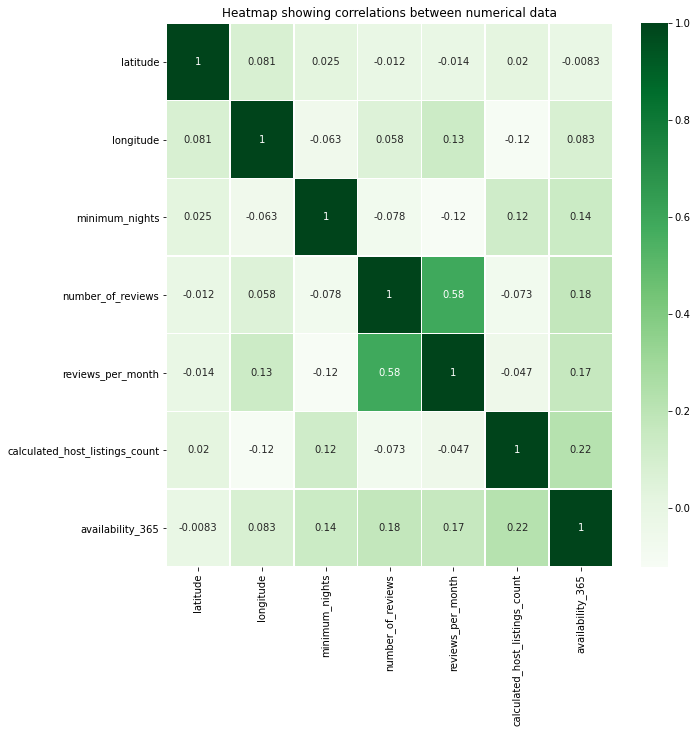

In [56]:
plt.figure(figsize=(10,10))  
sns.heatmap(df1_train_full_numeric.corr(),annot=True,linewidths=.5, cmap="Greens")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [43]:
df1_train_full_numeric.corr().unstack().sort_values(ascending = False)

latitude                        latitude                          1.000000
longitude                       longitude                         1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
reviews_per_month               reviews_per_month                 1.000000
minimum_nights                  minimum_nights                    1.000000
number_of_reviews               number_of_reviews                 1.000000
availability_365                availability_365                  1.000000
number_of_reviews               reviews_per_month                 0.584935
reviews_per_month               number_of_reviews                 0.584935
availability_365                calculated_host_listings_count    0.223328
calculated_host_listings_count  availability_365                  0.223328
availability_365                number_of_reviews                 0.175428
number_of_reviews               availability_365                  0.175428
availability_365         

The two features that have the biggest correlation in this dataset are `number_of_reviews` and `reviews_per_month`.

### Make price binary

* We need to turn the price variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the price is above (or equal to) `152`.

In [44]:
df0['above_average'] = np.where(df0['price']>=152, 1, 0)

In [45]:
df0['above_average'].value_counts(normalize=True)

0    0.695204
1    0.304796
Name: above_average, dtype: float64

### Question 3

* Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using `round(score, 2)`

In [49]:
cat_var = ['neighbourhood_group', 'room_type']

In [55]:
def calculate_mi(series):
    return mutual_info_score(series, df0.above_average)

df_mi = df0[cat_var].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
print(round(df_mi,2))

                       MI
room_type            0.14
neighbourhood_group  0.05


`room_type` has bigger score.

### Question 4

* Now let's train a logistic regression
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
   * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
   * `model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [64]:
num_var = ['latitude', 
           'longitude',
           'minimum_nights',
           'number_of_reviews',
           'reviews_per_month',
           'calculated_host_listings_count',
           'availability_365']

In [65]:
df2 = df0.drop('price', axis=1)

In [66]:
df2_train_full, df2_test = train_test_split(df2, test_size=0.20, random_state=42)

In [67]:
df2_train, df2_val = train_test_split(df2_train_full, test_size=0.25, random_state=42)

In [70]:
df2_train = df2_train.reset_index(drop=True)
df2_val = df2_val.reset_index(drop=True)
df2_test = df2_test.reset_index(drop=True)

In [71]:
y2_train = df2_train.above_average.values
y2_val = df2_val.above_average.values
y2_test = df2_test.above_average.values

In [72]:
train_dict = df2_train[cat_var + num_var].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [73]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y2_train)

LogisticRegression(random_state=42)

In [75]:
val_dict = df2_val[cat_var + num_var].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y2_val, y_pred),2)
print(accuracy)

0.79


### Question 5

* We have 9 features: 7 numerical features and 2 categorical.
* Let's find the least useful one using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `neighbourhood_group`
   * `room_type` 
   * `number_of_reviews`
   * `reviews_per_month`

> **note**: the difference doesn't have to be positive

In [79]:
features = cat_var + num_var

In [81]:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df2_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y2_train)

    val_dict = df2_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y2_val, y_pred)
    print(c, orig_score - score, score)

neighbourhood_group 0.03900296553839866 0.7509970344616014
room_type 0.07387360670825238 0.7161263932917477
latitude 0.003621024644646753 0.7863789753553533
longitude 0.0032119848655282057 0.7867880151344718
minimum_nights 0.004439104202883737 0.7855608957971163
number_of_reviews 0.003109724920748569 0.7868902750792515
reviews_per_month 0.0043368442581041 0.7856631557418959
calculated_host_listings_count 0.0033142448103078426 0.7866857551896922
availability_365 0.008427242049289352 0.7815727579507107


`number_of_reviews` has the smallest difference.

## Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'price'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

In [125]:
df0['price']=np.log1p(df0['price'])

In [126]:
df_train_full, df_test = train_test_split(df0, test_size=0.2, random_state=42)

In [127]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [128]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [129]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [130]:
del df_train['price']
del df_val['price']
del df_test['price']

In [131]:
train_dict = df_train[cat_var + num_var].to_dict(orient='records')

In [132]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat_var + num_var].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [134]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    print(a, round(score, 3))

0 0.497
0.01 0.497
0.1 0.497
1 0.497
10 0.498


Smallest `alpha` is 0.